# VeloCityX Fan Engagement Data
**Submission date:** 10/15/2024\
**Submission User:** Migus Wong

File Analyzed: *2025-VeloCityX-Expanded-Fan-Engagement-Data.csv*

Columns Given:
* User ID	
* Fan Challenges Completed
* Predictive Accuracy (%)	
* Virtual Merchandise Purchases
* Sponsorship Interactions (Ad Clicks)
* Time on Live 360 (mins)
* Real-Time Chat Activity (Messages Sent)




In [2]:
import warnings
import pandas as pd #for data frames
import matplotlib.pyplot as plt #for scatterplotting

#ignore warnings
warnings.filterwarnings("ignore")

#load and check csv has been successfully uploaded, renaming columns to something easier to type out
df = pd.read_csv('2025-VeloCityX-Expanded-Fan-Engagement-Data.csv',header=0, names=['uid','challengeComp','predAcc','purchases','adClicks','timeOnLive','chatActivity'])

#print dataframe statistics and first few rows of data
print('The size of the fan engagement data is: ',df.shape)
df.head()

The size of the fan engagement data is:  (100, 7)


,uid,challengeComp,predAcc,purchases,adClicks,timeOnLive,chatActivity
0,U001,5,80,3,10,120,20
1,U002,8,60,1,8,100,35
2,U003,3,90,0,6,90,5
3,U004,7,70,2,15,140,40
4,U005,2,50,5,3,60,8


## Data Preprocessing

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_columns = ['challengeComp','predAcc','purchases','adClicks','timeOnLive','chatActivity']

#create a scaled copy
df_scale = df.copy()

for c in numerical_columns:
    df_scale[c] = scaler.fit_transform(df[[c]])

#drop UID column since it is not relevant to the machine learning model
df_scale = df_scale.drop('uid',axis=1)
df_scale.head()

,challengeComp,predAcc,purchases,adClicks,timeOnLive,chatActivity
0,-0.280964,0.358801,0.160621,0.209240,-0.243232,-0.358357
1,0.785989,-1.073539,-0.812837,-0.107790,-0.763514,0.706069
2,-0.992267,1.074971,-1.299566,-0.424821,-1.023655,-1.422782
3,0.430338,-0.357369,-0.326108,1.001818,0.277050,1.060877
4,-1.347918,-1.789709,1.134078,-0.900368,-1.804077,-1.209897


In [4]:
# Remove outliers within 3 standard deviations
df_out = df_scale[(df_scale['challengeComp'].abs() <= 3) &
                  (df_scale['predAcc'].abs() <= 3) &
                  (df_scale['purchases'].abs() <= 3) &
                  (df_scale['adClicks'].abs() <= 3) &
                  (df_scale['timeOnLive'].abs() <= 3) &
                  (df_scale['chatActivity'].abs() <= 3)]
df_out.shape

(100, 6)

## Optimizing the number of clusters

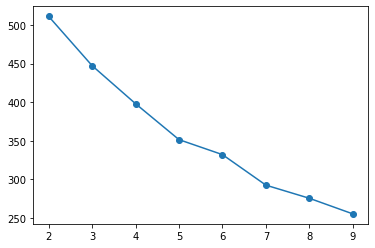

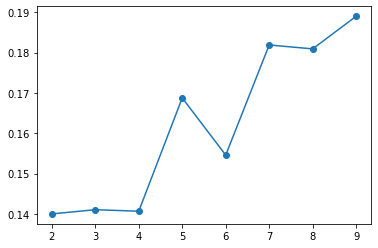

In [5]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


num_clusters = list(range(2,10))
intertia = []
silhouette_scores = []

for k in num_clusters:
    kmeans = KMeans(n_clusters = k, random_state=42).fit(df_scale)
    intertia.append(kmeans.inertia_)
    
    silhouette_avg = silhouette_score(df_scale, kmeans. labels_)
    silhouette_scores.append(silhouette_avg)
    
plt.plot(num_clusters,intertia, marker = 'o')
plt.show()

plt.plot(num_clusters, silhouette_scores,marker='o')
plt.show()
    

Based off the 2 plots above, it seems that around **7** clusters should be optimal

In [89]:
kmeans = KMeans(n_clusters=7, random_state=42).fit(df_scale)

labels = kmeans.labels_

df=df.drop("cluster", axis=1)
df["cluster"] = labels
df["clusterString"] = labels.astype(str)
df.head()


,uid,challengeComp,predAcc,purchases,adClicks,timeOnLive,chatActivity,clusterString,cluster
0,U001,5,80,3,10,120,20,3,3
1,U002,8,60,1,8,100,35,0,0
2,U003,3,90,0,6,90,5,3,3
3,U004,7,70,2,15,140,40,0,0
4,U005,2,50,5,3,60,8,5,5


## Cluster Exploration

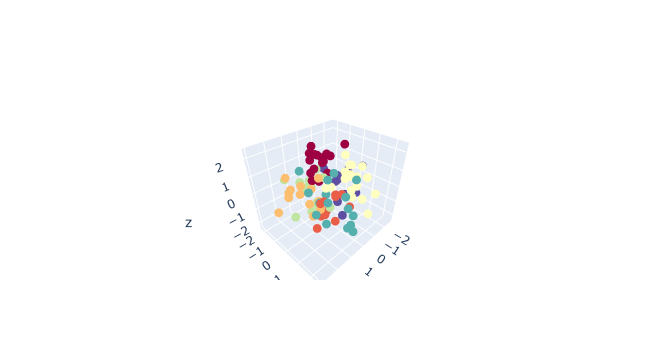

In [98]:
from sklearn.decomposition import PCA
import plotly.graph_objects as go 

pca = PCA(n_components=3)
pca_df = pca.fit_transform(df_scale)

fig = go.Figure(
    go.Scatter3d(mode='markers',
                x = pca_df[:, 0],
                y = pca_df[:, 1],
                z = pca_df[:, 2],
                 marker=dict(size=5,color = df['cluster'],colorscale = 'spectral')
                )
)
fig.show()

In [77]:
df["cluster"].value_counts()

cluster
3    18
0    16
5    16
4    13
2    13
1    12
6    12
Name: count, dtype: int64

<Figure size 1080x1080 with 0 Axes>

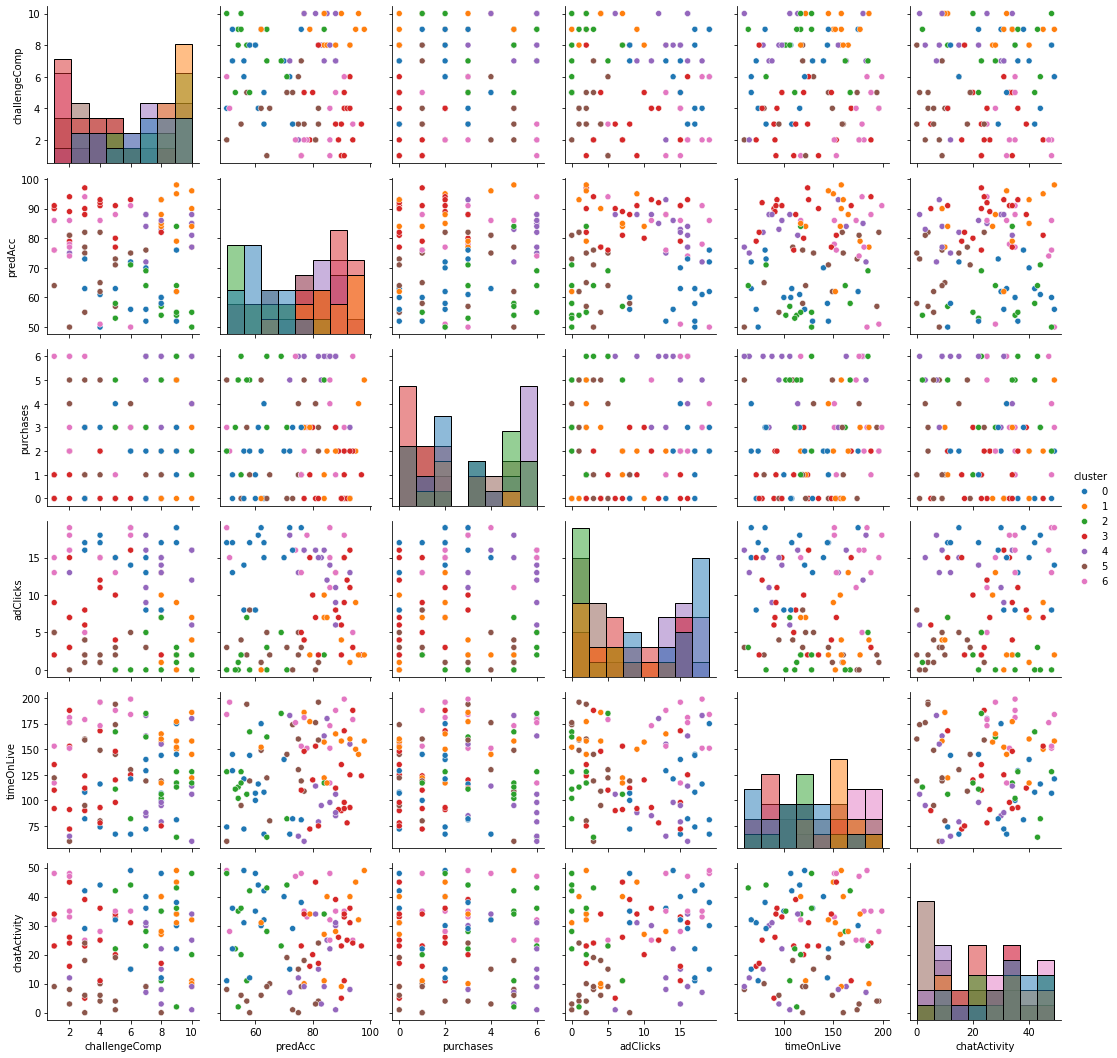

In [93]:
import seaborn as sns

# numerical data exploration
plt.figure(figsize=(15, 15))
g = sns.PairGrid(df[['challengeComp','predAcc','purchases','adClicks','timeOnLive','chatActivity','cluster']], hue = "cluster", palette = 'tab10')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

<AxesSubplot:xlabel='purchases', ylabel='Count'>

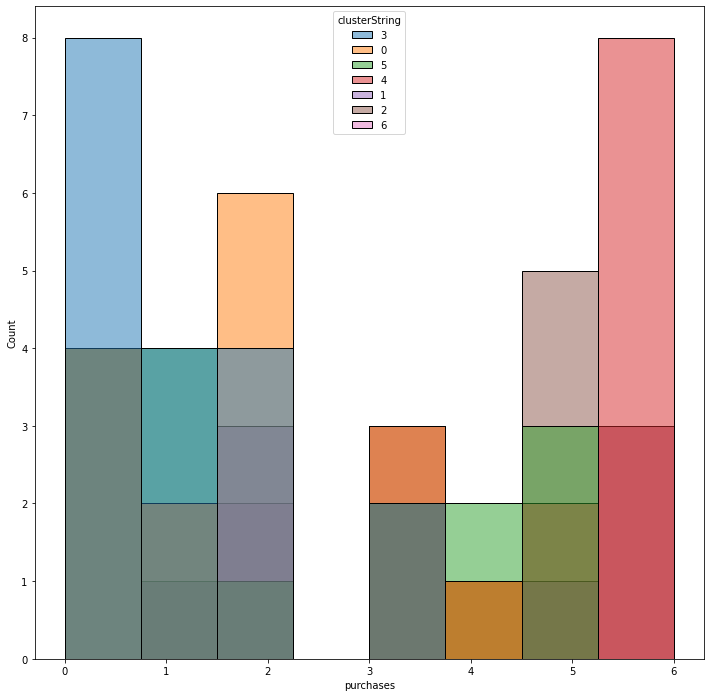

In [94]:
plt.figure(figsize=(12, 12))

#palette = sns.color_palette('tab10', n_colors=df['cluster'].nunique())
sns.histplot(x='purchases',data = df, hue="clusterString",palette='tab10',legend="full")


# Data Discussion

A plot grid has been created to try and visualize any strong correlations between each cluster. Cluster 4 has the highest amount of purchases so it may make sense to focus on this cluster group

In [ ]:
df[df["cluster"]==4].describe()

,challengeComp,predAcc,purchases,adClicks,timeOnLive,chatActivity,cluster
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.0
mean,7.846154,83.230769,5.230769,13.384615,113.153846,15.846154,4.0
std,2.154304,5.875852,1.165751,3.279697,42.748969,11.238670,0.0
min,2.000000,72.000000,3.000000,6.000000,60.000000,1.000000,4.0
25%,7.000000,81.000000,5.000000,12.000000,85.000000,8.000000,4.0
50%,8.000000,84.000000,6.000000,14.000000,98.000000,12.000000,4.0
75%,10.000000,88.000000,6.000000,16.000000,155.000000,25.000000,4.0
max,10.000000,93.000000,6.000000,18.000000,183.000000,34.000000,4.0


In [95]:
df.describe()

,challengeComp,predAcc,purchases,adClicks,timeOnLive,chatActivity,cluster
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.790000,74.990000,2.670000,8.680000,129.350000,25.050000,2.960000
std,2.825908,14.033506,2.064882,6.340315,38.634358,14.163101,1.984383
min,1.000000,50.000000,0.000000,0.000000,60.000000,0.000000,0.000000
25%,3.000000,62.000000,1.000000,2.000000,98.000000,11.000000,1.000000
50%,6.000000,77.000000,2.000000,8.000000,124.500000,25.500000,3.000000
75%,8.000000,86.500000,5.000000,15.000000,160.000000,35.000000,5.000000
max,10.000000,98.000000,6.000000,19.000000,199.000000,49.000000,6.000000


When compared with the rest of the data, **Cluster 7 are users who purchased the most virtual merchandise and tend to complete more challenges and click on more ads**.\
It doesn't appear that they spend significantly more/less time on live or in the chat. Based off this data, VeloCityX should consider driving engagement in this specific group of users by continuing to enhance and monetize the challenges.

There were no siginificant correlations found between user activity during events and purchases.

# New Fan Challenge Reccomendation: Weekly/Monthly Challenges

The current monetization strategies focus on the purchase of virtual merchandise such as team jerseys, vehicle skins, and exclusive digital collectibles. The app also offers sponsorship opportunities where brands can sponsor race events or place ads to reach target audiences.

Where I see the most potential for monetization growh is through the continual engagement with challenges and continuing to grow this "group 4" customer base. A project that could help achieve this goal would be the incorporation of weekly/monthly bet prediction challenges.

Because this group of users only represents 13% of the sample population but makes nearly double the amount of purchases as a typical user, getting other users to participate will be the key to continual monetization. With the implementation of challenges on a recurring basis in a semi-regular schedule, VeloCityX will continue to expose the entire userbase to the concept of Fan Challenges on a consistent basis and help grow revenue.
